In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Dataset .csv')


In [2]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
#HANDLING MISSING VALUES
data = data.dropna()

In [4]:
#cities and cuisines
data = data.dropna(subset=['City', 'Cuisines'])
data['Cuisines'] = data['Cuisines'].str.split(", ")
data_explode = data.explode('Cuisines')
city_cuisine_table = data_explode.groupby("City")["Cuisines"].unique().reset_index()

# Convert cuisines from array to a comma-separated string
city_cuisine_table["Cuisines"] = city_cuisine_table["Cuisines"].apply(lambda x: ", ".join(x))
city_cuisine_table = pd.DataFrame(city_cuisine_table)
# Display the table
city_cuisine_table
#save the data
city_cuisine_table.to_csv("city_cuisine_table.csv", index=False)



,Longitude,Latitude,City,Cuisines
0,121.027535,14.565443,Abu Dhabi,"American, Italian, Pizza, Turkish, Arabian, Mi..."
1,121.014101,14.553708,Agra,"North Indian, Mughlai, Rajasthani, Chinese, Eu..."
2,121.056831,14.581404,Ahmedabad,"Chinese, Italian, North Indian, Mexican, Medit..."
3,121.056475,14.585318,Albany,"BBQ, Burger, Seafood, American, Steak,American..."
4,121.057508,14.584450,Allahabad,"North Indian, South Indian, Fast Food, Cafe, S..."
...,...,...,...,...
9546,28.977392,41.022793,NaN,NaN
9547,29.041297,41.009847,NaN,NaN
9548,29.034640,41.055817,NaN,NaN
9549,29.036019,41.057979,NaN,NaN


In [5]:
#import geopandas for geospatial analysis
import geopandas


#transforming longitude and latitude into a list of shapely.Point objects and set it as a geometry          
geodata = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data.Longitude, data.Latitude), crs="EPSG:4326"
)

In [6]:
print(geodata.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [7]:
#getting rid of unnecessary columns
geodata = geodata.drop(columns=['Locality Verbose','Address','Currency','Rating color','Rating text','Votes','Switch to order menu','Is delivering now'])

In [8]:
geodata

,Restaurant ID,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,geometry
0,6317637,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Yes,No,3,4.8,POINT (121.02754 14.56544)
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Yes,No,3,4.5,POINT (121.0141 14.55371)
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Yes,No,4,4.4,POINT (121.05683 14.5814)
3,6318506,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,No,No,4,4.9,POINT (121.05648 14.58532)
4,6314302,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Yes,No,4,4.8,POINT (121.05751 14.58445)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,Karak�_y,28.977392,41.022793,Turkish,80,No,No,3,4.1,POINT (28.97739 41.02279)
9547,5908749,Ceviz A��ac۱,208,��stanbul,Ko��uyolu,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,No,No,3,4.2,POINT (29.0413 41.00985)
9548,5915807,Huqqa,208,��stanbul,Kuru�_e��me,29.034640,41.055817,"Italian, World Cuisine",170,No,No,4,3.7,POINT (29.03464 41.05582)
9549,5916112,A���k Kahve,208,��stanbul,Kuru�_e��me,29.036019,41.057979,Restaurant Cafe,120,No,No,4,4.0,POINT (29.03602 41.05798)


In [9]:
!pip install geodatasets

C:\Users\Nebolisa Kosiso\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


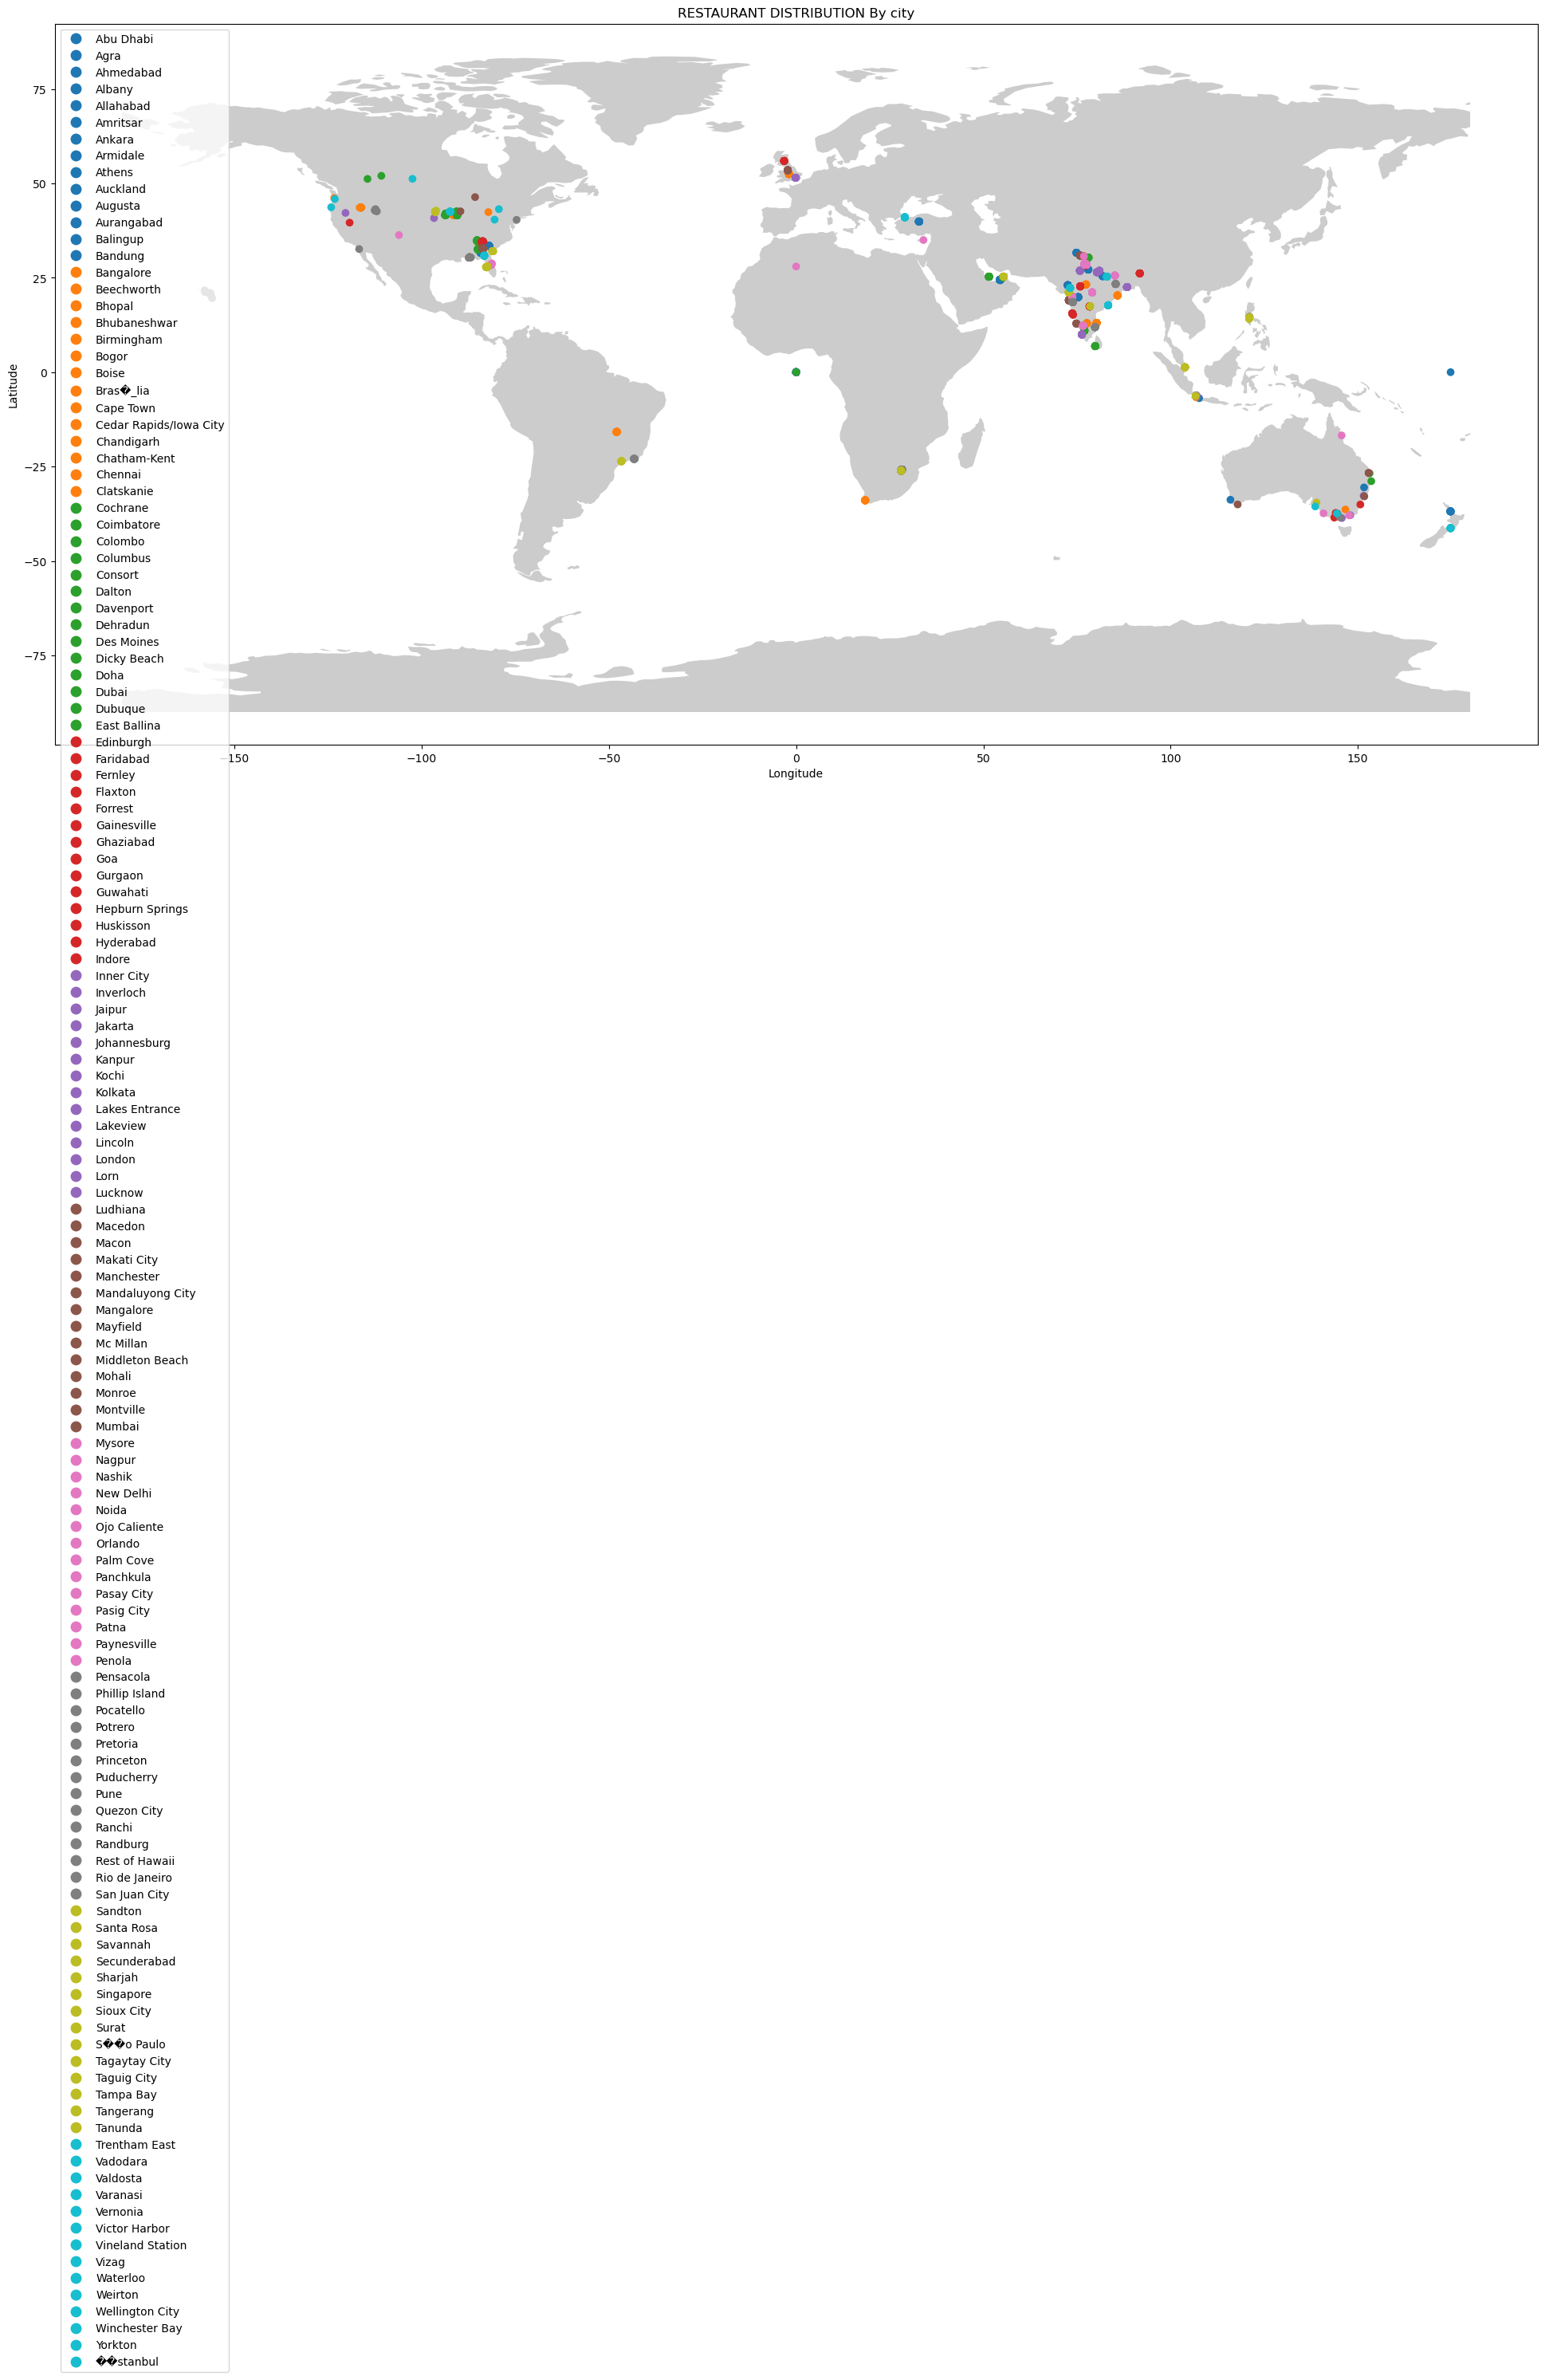

In [10]:
#visualizing distribution based on city using matplotlib 

#import library to display on world map
import geodatasets
fig, ax = plt.subplots(figsize=(24, 18))
#using the natural earth dataset
world = geopandas.read_file(geodatasets.get_path("naturalearth.land"))
world.plot(ax=ax, alpha=0.4, color="grey")
geodata.plot(column="City", ax=ax, legend=True)
plt.title("RESTAURANT DISTRIBUTION By city")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig("distribution.png", dpi=100)

In [11]:
#decided to use folium to make our map more interactive
import folium

rest_map = folium.Map(tiles="cartodb positron", zoom_start=5)
rest_map
#incomplete but would keep working on it

In [12]:
#we want to plot our country specific data on this map
#we need a layer that we can connect to our data


In [13]:
#data analysis
#price ranges and city
ratings_by_price = geodata.groupby('City')['Price range'].mean().sort_values(ascending=False)
ratings_by_price

City
Princeton           4.0
Inner City          4.0
Vineland Station    4.0
Johannesburg        4.0
Panchkula           4.0
                   ... 
Lakeview            1.0
Lakes Entrance      1.0
Inverloch           1.0
Fernley             1.0
Clatskanie          1.0
Name: Price range, Length: 140, dtype: float64

In [14]:
#checking the spread of price ranges across the cities
spread_summary = geodata.groupby('Price range')['City'].nunique()
print(spread_summary)


Price range
1     69
2    105
3     99
4     75
Name: City, dtype: int64


Text(0, 0.5, 'Price range')

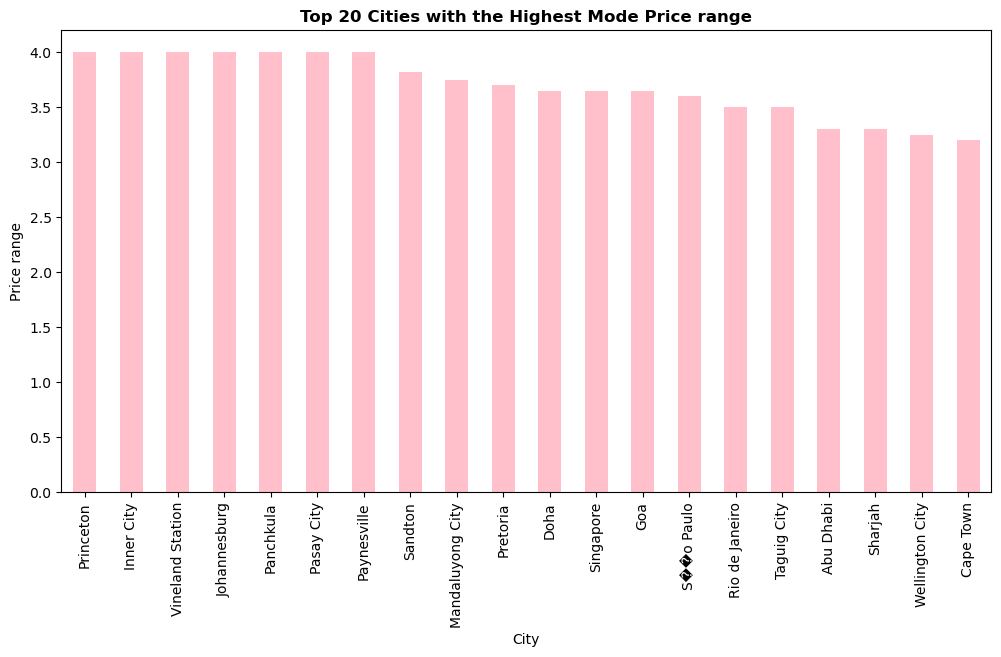

In [15]:
city_by_price = geodata.groupby('City')['Price range'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6)) 
pd.Series(city_by_price)[:20].plot(kind='bar',color= 'pink')
plt.title('Top 20 Cities with the Highest Mode Price range',weight='bold')
plt.xlabel('City')
plt.ylabel('Price range')

In [16]:
spread = geodata.groupby(['City', 'Price range']).size().unstack(fill_value=0)
print(spread)
spread.to_csv('spread.csv', index=True)


Price range       1  2   3   4
City                          
Abu Dhabi         0  4   6  10
Agra              3  6   6   5
Ahmedabad         1  8  11   1
Albany           11  5   3   1
Allahabad         2  4  13   1
...              .. ..  ..  ..
Weirton           0  1   0   0
Wellington City   1  2   8   9
Winchester Bay    0  1   0   0
Yorkton           0  1   0   0
��stanbul         0  5   6   3

[140 rows x 4 columns]


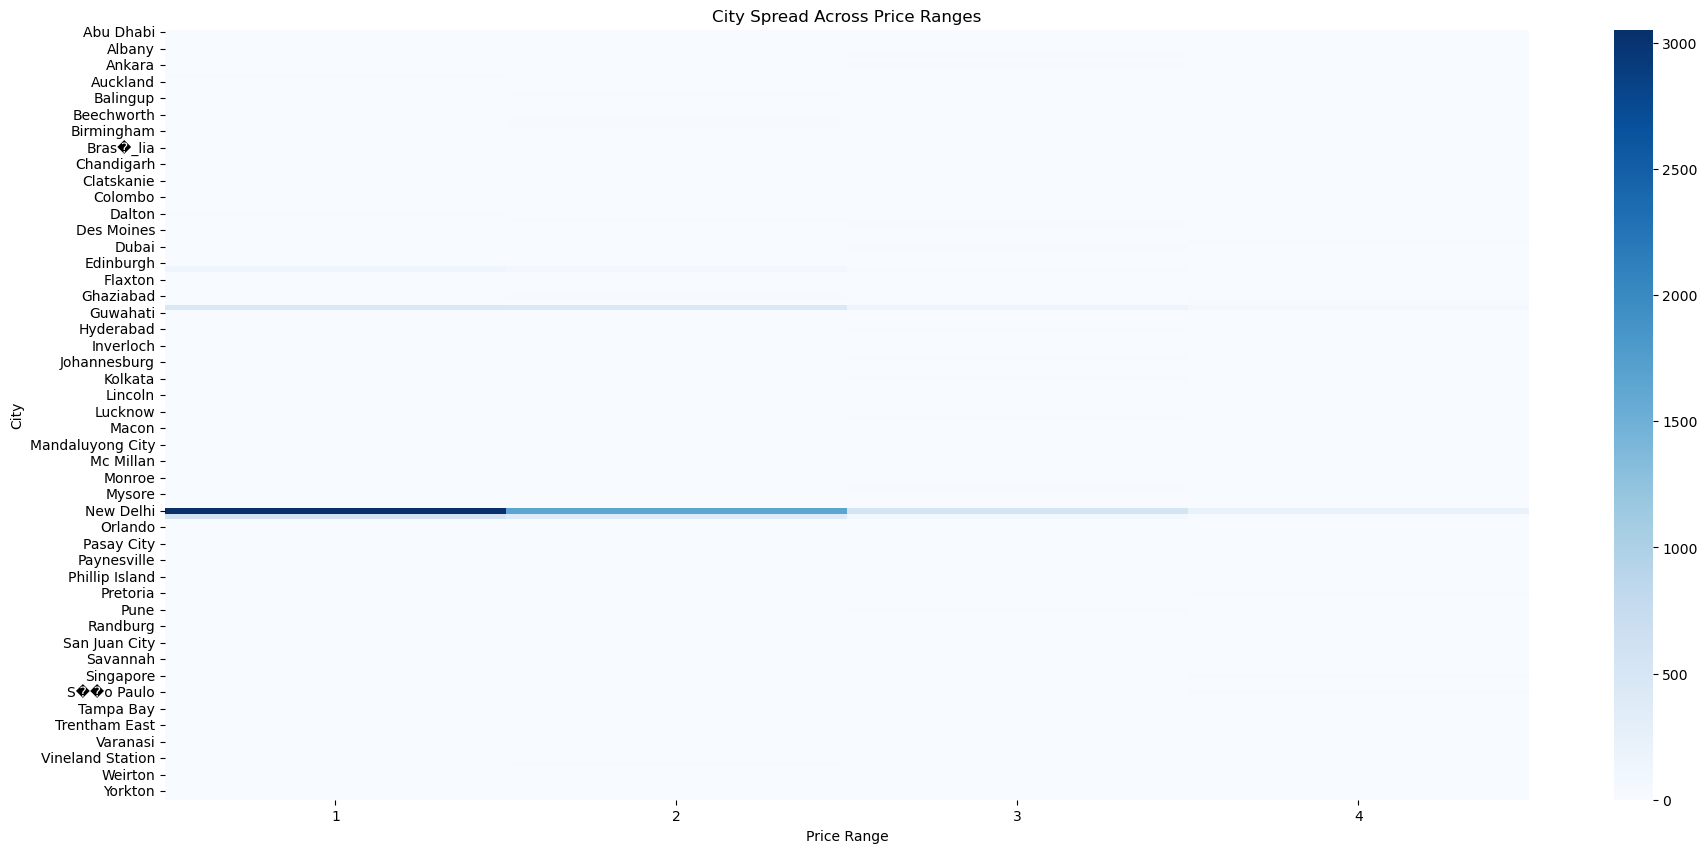

In [18]:
import seaborn as sns
plt.figure(figsize=(22, 10))
sns.heatmap(spread, cmap="Blues", cbar=True)
plt.title("City Spread Across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("City")
plt.show()

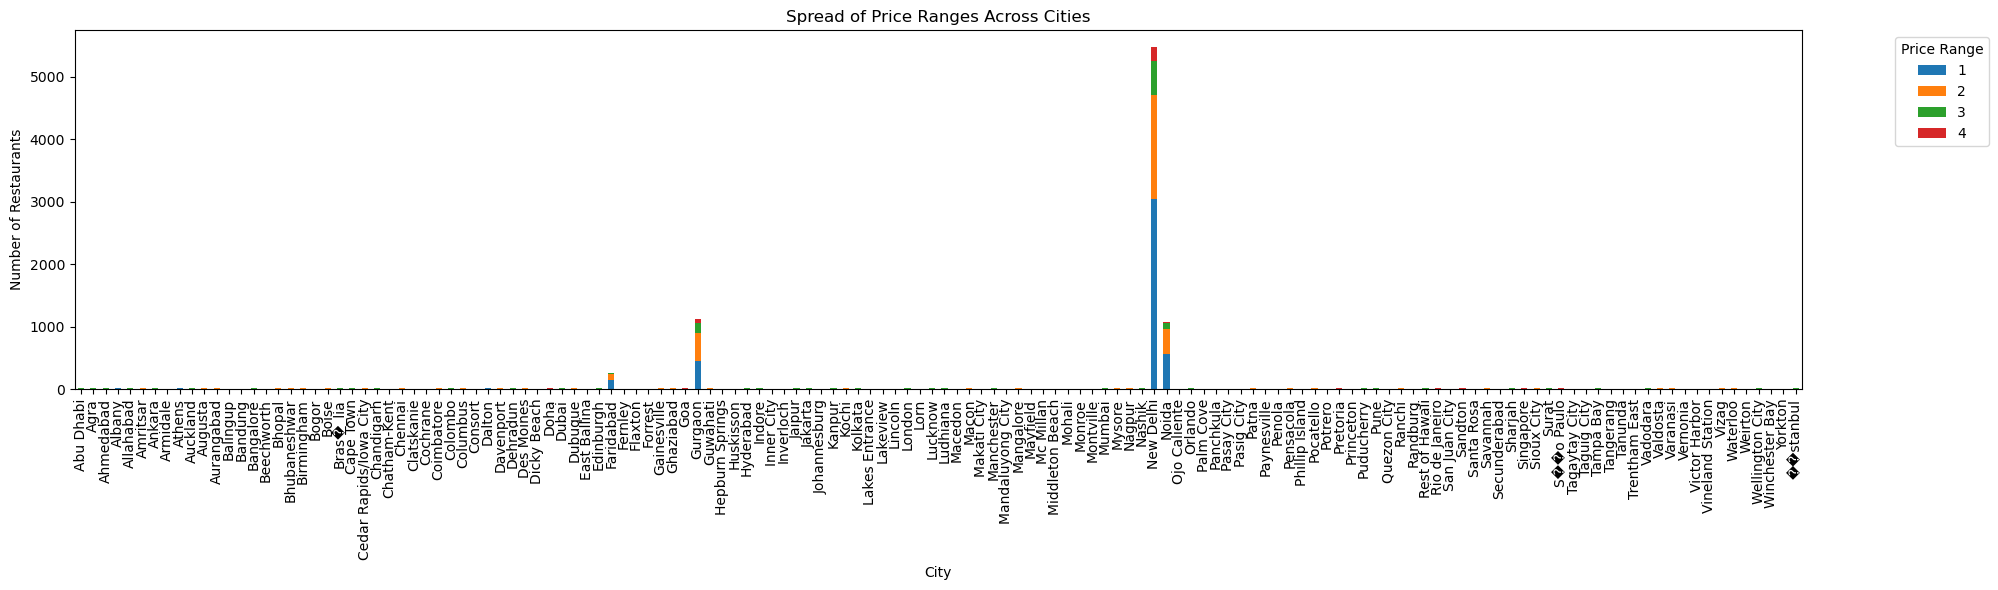

In [20]:
import matplotlib.pyplot as plt

spread.plot(kind='bar', stacked=True, figsize=(20, 6))
plt.title('Spread of Price Ranges Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Aggregate rating')

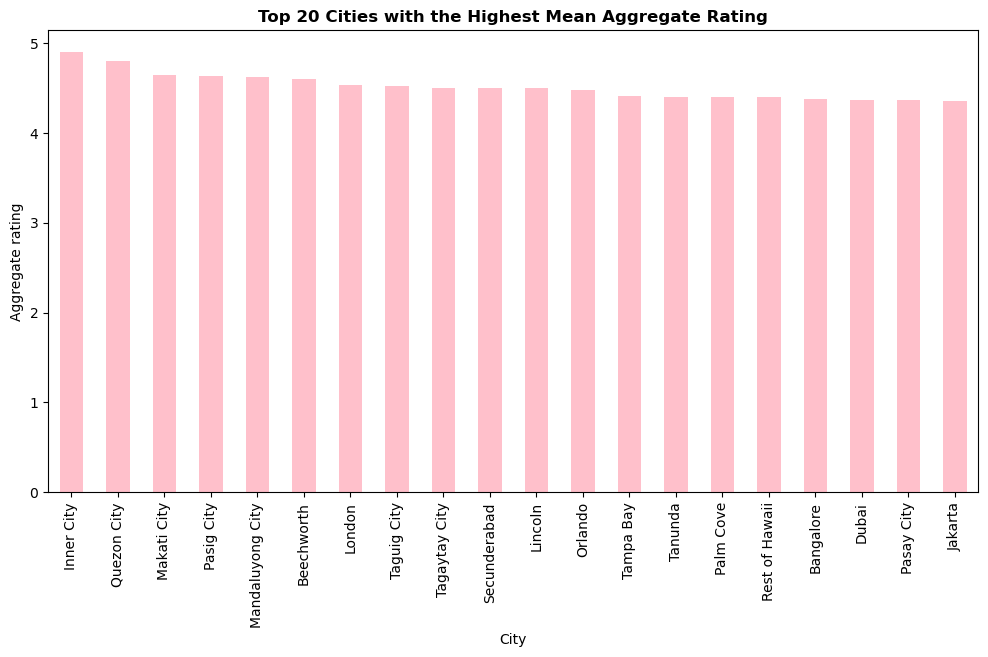

In [21]:

#cities and aggregate rating
ratings_by_city = geodata.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6)) 
pd.Series(ratings_by_city)[:20].plot(kind='bar',color= 'pink')
plt.title('Top 20 Cities with the Highest Mean Aggregate Rating',weight='bold')
plt.xlabel('City')
plt.ylabel('Aggregate rating')

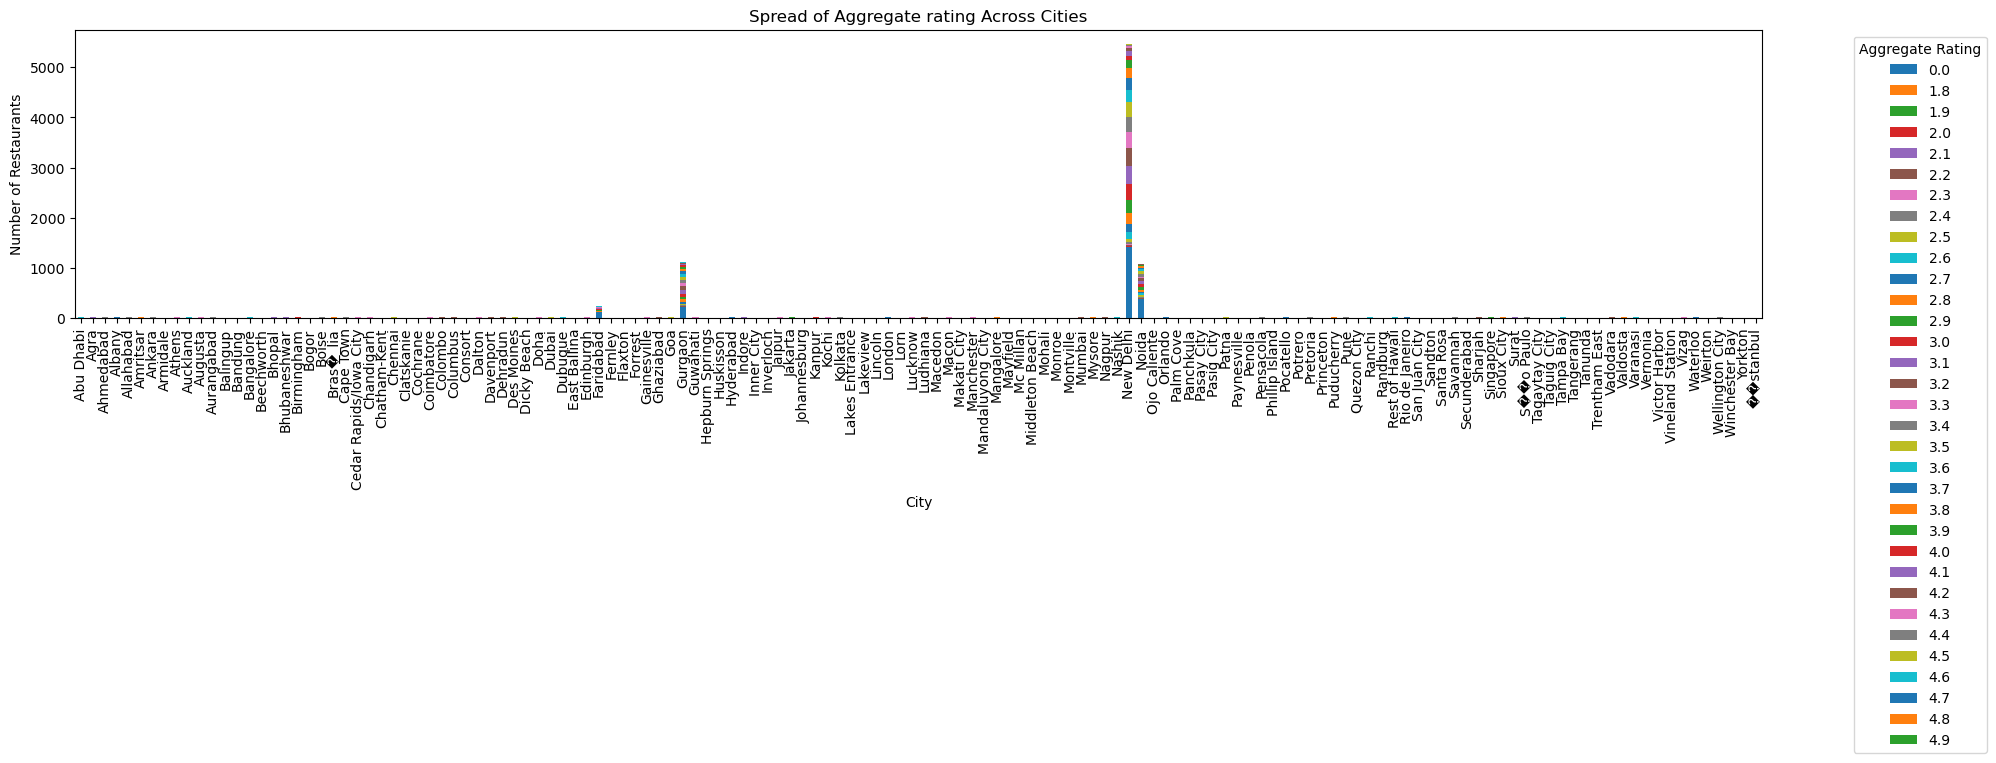

In [22]:
spread = geodata.groupby(['City', 'Aggregate rating']).size().unstack(fill_value=0)
spread.plot(kind='bar', stacked=True, figsize=(20, 6))
plt.title('Spread of Aggregate rating Across Cities')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.legend(title='Aggregate Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

array([], dtype=float64)